## Import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

## Functions

In [3]:
def ensembling(main, support, coeff1, coeff2, coeff3, coeff4, coeff5, coeff6, coeff7, coeff8): 
    
    suba  = main.copy()
    subav = suba.values
    
    subb  = support.copy()
    subbv = subb.values    
              
    ense  = main.copy()
    ensev = ense.values
 
    for i in range (len(main)):       
        idst = subav[i, 0]
        pera = subav[i, 1]       
        perb = subbv[i, 1] 
        
        if ((idst[0]=='0') or (idst[0]=='1')):        
            per = (pera * coeff1) + (perb * (1.0 - coeff1))

        if ((idst[0]=='2') or (idst[0]=='3')):        
            per = (pera * coeff2) + (perb * (1.0 - coeff2))
            
        if ((idst[0]=='4') or (idst[0]=='5')):        
            per = (pera * coeff3) + (perb * (1.0 - coeff3))

        if ((idst[0]=='6') or (idst[0]=='7')):        
            per = (pera * coeff4) + (perb * (1.0 - coeff4))   
                      
        if ((idst[0]=='8') or (idst[0]=='9')):        
            per = (pera * coeff5) + (perb * (1.0 - coeff5))

        if ((idst[0]=='a') or (idst[0]=='b')):        
            per = (pera * coeff6) + (perb * (1.0 - coeff6))
            
        if ((idst[0]=='c') or (idst[0]=='d')):        
            per = (pera * coeff7) + (perb * (1.0 - coeff7))

        if ((idst[0]=='e') or (idst[0]=='f')):        
            per = (pera * coeff8) + (perb * (1.0 - coeff8))                             
           
        ensev[i, 1] = per
        
    ense.iloc[:, 1] = ensev[:, 1]

    ###############################    
    X  = suba.iloc[:, 1]
    Y1 = subb.iloc[:, 1]
    Y2 = ense.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nE N S E M B L I N G\n')   
      
    plt.scatter(X, Y1, s=1.5, label='Support')    
    plt.scatter(X, Y2, s=1.5, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.savefig('Ensembling_1.png')
    plt.show()     
    ###############################   
    ense.iloc[:, 1] = ense.iloc[:, 1].astype(float)
    hist_data = [subb.iloc[:, 1], ense.iloc[:, 1], suba.iloc[:, 1]] 
    group_labels = ['Support', 'Ensembling', 'Main']
    
    fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False)
    fig.show()   
    ###############################   
    
    return ense     


In [4]:
def drawing(ense, comp):    
    comp.iloc[:, 1] = comp.iloc[:, 1].astype(float)
    hist_data = [ense.iloc[:, 1], comp.iloc[:, 1]] 
    group_labels = [ 'Ensembling', 'Comparative Method']
    
    fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False)
    fig.show()   

## Data Set

Thanks to: @miklgr500 https://www.kaggle.com/miklgr500/g2net-efficientnetb1-tpu-evaluate/output

In [5]:
path0 = '../input/g2net-834/submission.csv'

sub834a = pd.read_csv(path0).sort_values('id')

Thanks to: @mrigendraagrawal https://www.kaggle.com/mrigendraagrawal/tf-g2net-eda-and-starter

In [6]:
path1 = '../input/g2net-855a/submission.csv'

sub855a = pd.read_csv(path1).sort_values('id')

Thanks to: @yasufuminakama https://www.kaggle.com/yasufuminakama/g2net-efficientnet-b7-baseline-inference

In [7]:
path2 = '../input/g2net-860/submission.csv'

sub860a = pd.read_csv(path2).sort_values('id')

Thanks to: @wabinab https://www.kaggle.com/wabinab/submission-baseline

In [8]:
path3 = '../input/g2net-861/submission.csv'

sub861a = pd.read_csv(path3).sort_values('id')

Thanks to: @ihelon https://www.kaggle.com/ihelon/g2net-eda-and-modeling/output?select=model_submission.csv

In [9]:
path4 = '../input/g2net-864/model_submission.csv'

sub864a = pd.read_csv(path4).sort_values('id')

Thanks to: @miklgr500 https://www.kaggle.com/miklgr500/cqt-g2net-efficientnetb1-tpu-inference/output?select=submission.csv

Thanks to: @xuxu1234 https://www.kaggle.com/xuxu1234/lb-0-866-g2net-efficientnetb7-tpu-inference

In [10]:
path5 = '../input/g2net-866/submission.csv'

sub866a = pd.read_csv(path5).sort_values('id')

In [11]:
path = [path0, path1, path2, path3, path4, path5]

In [12]:
hist_data = [sub834a.target, sub855a.target, sub860a.target, sub861a.target, sub864a.target, sub866a.target]  

group_labels = ['0.834a', '0.855a', '0.860a', '0.861a', '0.864a', '0.866a']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 

fig.show()

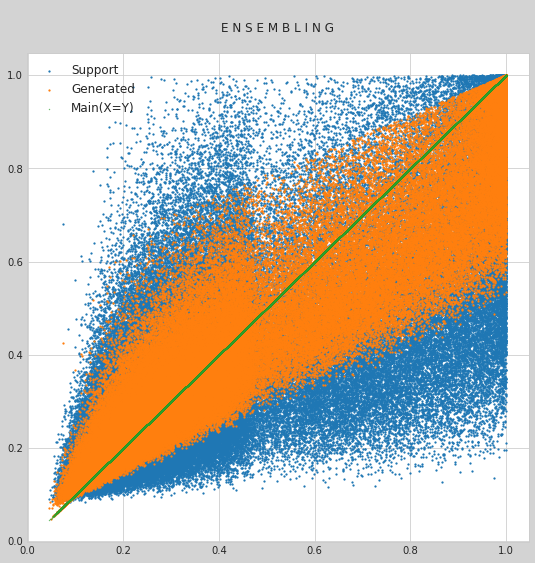

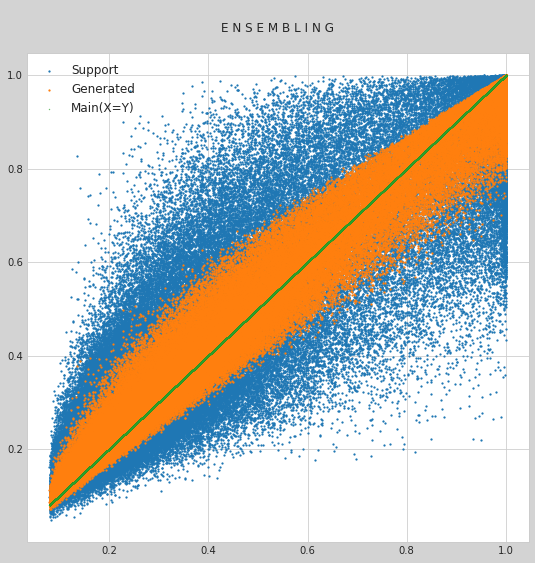

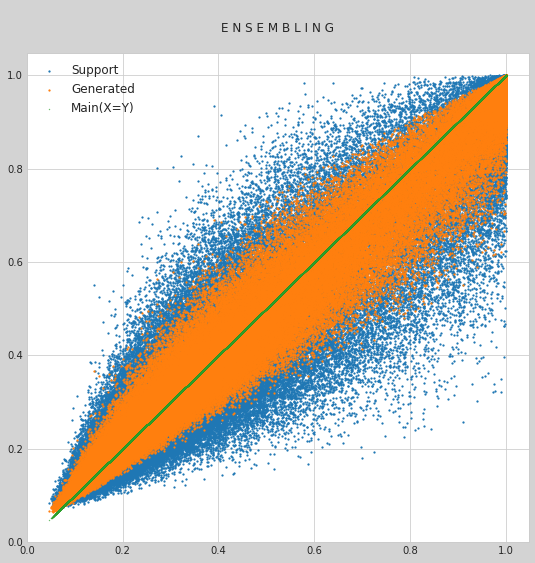

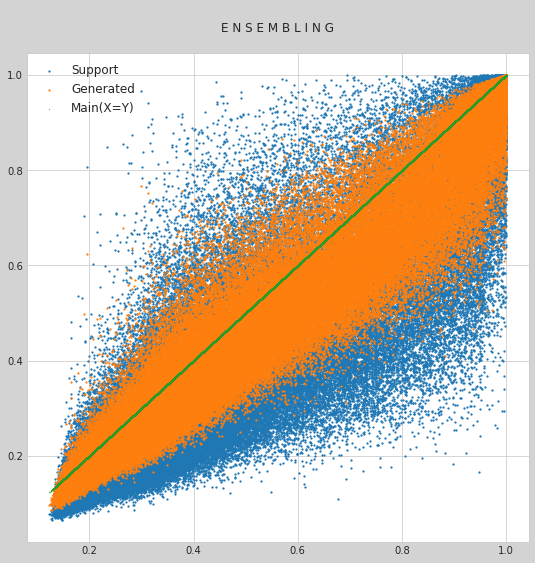

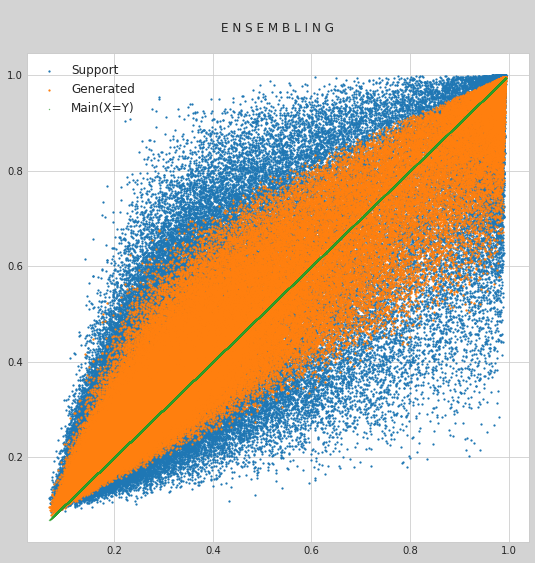

In [13]:
sub1 = ensembling(sub855a, sub834a, 0.42, 0.42, 0.42, 1.00, 1.00, 0.42, 0.42, 0.42)

sub2 = ensembling(sub860a,    sub1, 0.60, 0.60, 0.60, 0.65, 0.65, 0.60, 0.60, 0.60)

sub3 = ensembling(sub861a,    sub2, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45)

sub4 = ensembling(sub864a,    sub3, 0.45, 0.45, 0.40, 0.55, 0.30, 0.45, 0.45, 0.45)

sub5 = ensembling(sub866a,    sub4, 0.42, 0.42, 0.42, 0.42, 0.50, 0.42, 0.42, 0.42)

## Submission

In [14]:
sub1.to_csv("submission1.csv",index=False)
sub2.to_csv("submission2.csv",index=False)
sub3.to_csv("submission3.csv",index=False)
sub4.to_csv("submission4.csv",index=False)
sub5.to_csv("submission5.csv",index=False)

!ls

Ensembling_1.png    submission1.csv  submission3.csv  submission5.csv
__notebook__.ipynb  submission2.csv  submission4.csv
